<a href="https://colab.research.google.com/github/manojrathor/mnist/blob/master/mnist_MLP_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive


In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
# import libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [0]:
# load dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

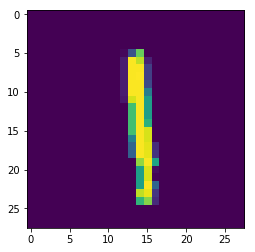

In [32]:
plt.imshow(x_train[8])
plt.show()

In [33]:
# computer the shape of the train and test dataser
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [36]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [0]:
model = Sequential()
model.add(Dense(64,activation = 'relu',input_shape = (784,)))
model.add(Dense(10,activation = 'softmax'))

In [0]:
# Compile a model
model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [39]:
# fir the model to training data
model.fit(x_train,y_train,validation_split = 0.2, epochs =50, batch_size = 64)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 67us/step - loss: 0.9840 - acc: 0.7576 - val_loss: 0.5148 - val_acc: 0.8719
Epoch 2/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.4703 - acc: 0.8760 - val_loss: 0.3900 - val_acc: 0.8935
Epoch 3/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.3905 - acc: 0.8915 - val_loss: 0.3447 - val_acc: 0.9032
Epoch 4/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.3535 - acc: 0.8999 - val_loss: 0.3196 - val_acc: 0.9097
Epoch 5/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.3300 - acc: 0.9062 - val_loss: 0.3019 - val_acc: 0.9153
Epoch 6/50
48000/48000 [==============================] - 3s 64us/step - loss: 0.3127 - acc: 0.9104 - val_loss: 0.2901 - val_acc: 0.9177
Epoch 7/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.2987 - acc: 0.9150 - val_loss: 0.2783 - val_acc

In [40]:
model.evaluate(x_test,y_test,batch_size = 128)

10000/10000 [==============================] - 0s 17us/step


[0.13148493313789367, 0.9617]